7. Хорошо обусловленные матрицы
Провести серию экспериментов, тестирующую функции scipy.linalg.solve, numpy.linalg.cond на хорошо обусловленных матрицах. Число обусловленности на следующих классах матриц с ростом порядка матрицы  растет умеренно:
A = L U, где L,U  – случайные нижняя треугольная и верхняя треугольная матрицы соответственно с диагональным преобладанием.
A = LL, где L  – случайные нижняя треугольная матрица с диагональным преобладанием.
Экспериментальным путем для каждого из перечисленных классов установить диапазон изменения порядка матрицы, при котором число обусловленности не превосходит ведичины порядка . Построить графики значений, выдаваемых функцией cond. Построить графики используемого этими функциями времени. Для каждой матрицы задать случайно решение . По матрице  и решению  сгенерировать правую часть системы линейных уравнений . Решить систему , используя команду solve. Построить графики относительной ошибки решения и невязки. 

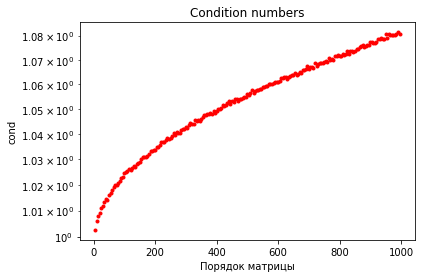

In [1]:
from numpy import random
import scipy.linalg as linalg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

# для начала посчитаем числа обусловленности и построим по ним график

n_vector = np.arange(5, 1000, 5)
cond_array = []
t=[]
for n in n_vector:
    A=np.random.randint(-30,30,(n,n))
    for i in range(0,n):
        A[i][i]=20000
    L=np.tril(A)
    U=np.triu(A)
    LU=L@U
    # посчитаем число обусловленности и время
    begin=time.monotonic()
    cond_array.append(np.linalg.cond(LU))
    t.append(time.monotonic()-begin)
plt.semilogy(n_vector,cond_array,'.r')
plt.title('Condition numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('cond')
pass

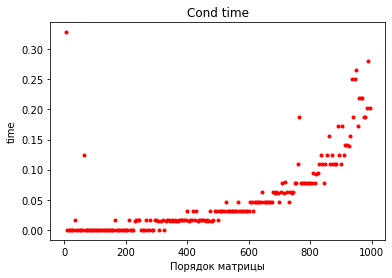

In [2]:
plt.plot(n_vector,t,'.r')
plt.title('Cond time')
plt.xlabel('Порядок матрицы')
plt.ylabel('time')
pass

In [3]:
t_solve=[]
er_array=[]
discr_array=[]
for n in n_vector:
    A=np.random.randint(-30,30,(n,n))
    for i in range(0,n):
        A[i][i]=20000
    L=np.tril(A)
    U=np.triu(A)
    LU=L@U
    x_prec = random.rand(n)# создадим вектор решений системы
    b=LU@x_prec #сгенерируем по x_prec правую часть
    begin=time.monotonic()
    x_comp=linalg.solve(LU,b) # решеним систему LU*x=b
    finish = time.monotonic()-begin
    t_solve.append(finish)
    er=linalg.norm(x_comp-x_prec)/linalg.norm(x_prec) # вычисление относительной ошибки
    er_array.append(er)
    discr=linalg.norm(LU.dot(x_comp) - b)/linalg.norm(b) #вычисление невязки
    discr_array.append(discr)

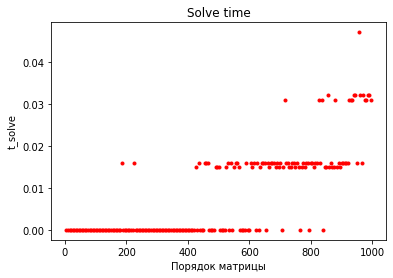

In [4]:
plt.plot(n_vector,t_solve,'.r')
plt.title('Solve time')
plt.xlabel('Порядок матрицы')
plt.ylabel('t_solve')
pass

In [5]:
t_3=[]
for i in range (0,len(t_solve)):
    t_3.append(t_solve[i]/n_vector[i]**2)

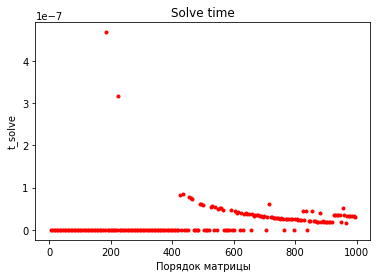

In [6]:
plt.plot(n_vector,t_3,'.r')
plt.title('Solve time')
plt.xlabel('Порядок матрицы')
plt.ylabel('t_solve')
pass

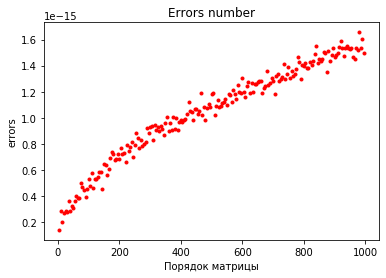

In [7]:
plt.plot(n_vector,er_array,'.r')
plt.title('Errors number')
plt.xlabel('Порядок матрицы')
plt.ylabel('errors')
pass

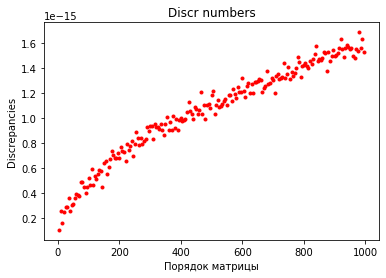

In [8]:
plt.plot(n_vector,discr_array,'.r')
plt.title('Discr numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('Discrepancies')
pass

In [9]:
cond_array = []
t=[]
t_solve=[]
er_array=[]
discr_array=[]
for n in n_vector:
    L=np.random.randint(-60,60,(n,n))
    for i in range(0,n):
        L[i][i]=30000
    L=np.tril(L)
    LT=L@L.T
    # посчитаем число обусловленности и время
    begin=time.monotonic()
    cond_array.append(np.linalg.cond(LT))
    t.append(time.monotonic()-begin)
    x_prec = random.rand(n)# создадим вектор решений системы
    b=LT@x_prec #сгенерируем по x_prec правую часть
    begin=time.monotonic()
    x_comp=linalg.solve(LT,b) # решеним систему LT*x=b
    finish = time.monotonic()-begin
    t_solve.append(finish)
    er=linalg.norm(x_comp-x_prec)/linalg.norm(x_prec) # вычисление относительной ошибки
    er_array.append(er)
    discr=linalg.norm(LT.dot(x_comp) - b)/linalg.norm(b) #вычисление невязки
    discr_array.append(discr)

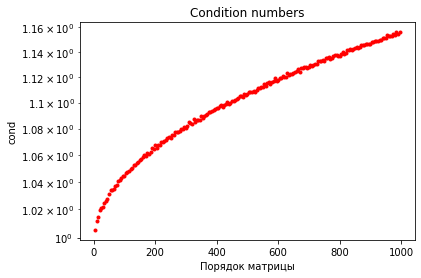

In [10]:
plt.semilogy(n_vector,cond_array,'.r')
plt.title('Condition numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('cond')
pass

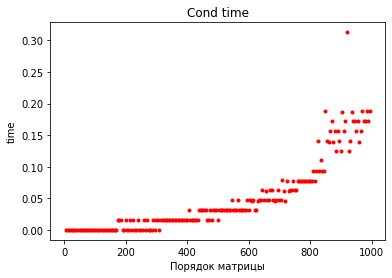

In [11]:
plt.plot(n_vector,t,'.r')
plt.title('Cond time')
plt.xlabel('Порядок матрицы')
plt.ylabel('time')
pass

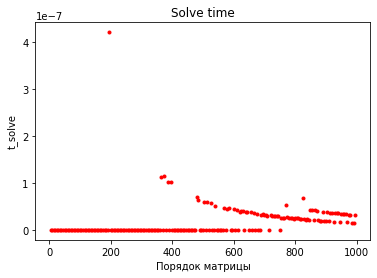

In [12]:
t_3=[]
for i in range (0,len(t_solve)):
    t_3.append(t_solve[i]/n_vector[i]**2)
plt.plot(n_vector,t_3,'.r')
plt.title('Solve time')
plt.xlabel('Порядок матрицы')
plt.ylabel('t_solve')
pass

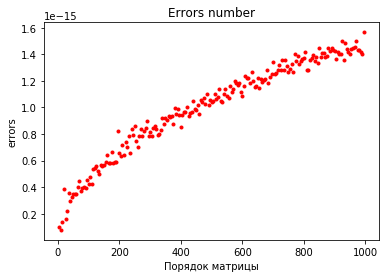

In [13]:
plt.plot(n_vector,er_array,'.r')
plt.title('Errors number')
plt.xlabel('Порядок матрицы')
plt.ylabel('errors')
pass

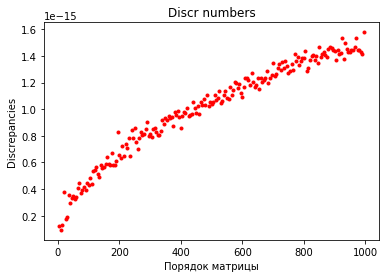

In [14]:
plt.plot(n_vector,discr_array,'.r')
plt.title('Discr numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('Discrepancies')
pass

8. Плохо обусловленные матрицы

Провести серию экспериментов, тестирующую команды scipy.linalg.solve, numpy.linalg.cond на плохо обусловленных матрицах вида A = LU , где L,U  – случайные нижняя треугольная и верхняя треугольная матрицы соответственно с малыми диагональными элементами.
Как выяснилось на двух предыдущих эскпериментах диапазон изменения элементов влияет на число обусловленности. Для начала зададим диапазон от -30 до 30. К тому же матрицы сами по себе получатся с малыми диагональными элементами. Код ничем не будет отличаться от кода в предыдущих экспериментах. Так же сразу на одних и тех же матрицах проведём все эксперименты.
Для устранения предупреждений, связанных с тем, что библиотека будет обрабатывать плохо обусловленные матрицы(так как число обусловленности слишком большие и к тому же ещё и нецелые, то компьютер не может их посчитать, из-за этого и выдаёт предупреждения), воспользуемся функцией filterwarnings.

In [15]:
from numpy import random
import scipy.linalg as linalg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import warnings
warnings.filterwarnings("ignore")
n_vector = np.arange(5, 1000, 5)
cond_array = []
t=[]
t_solve=[]
er_array=[]
discr_array=[]
for n in n_vector:
    B = np.random.uniform(-30, 30, (n,n))
    L=np.tril(B)
    B = np.random.uniform(-30, 30, (n,n))
    U=np.triu(B)
    LU=L@U
    begin = time.monotonic()
    cond_array.append(np.linalg.cond(LU))
    t.append(time.monotonic()-begin)
    x_prec = random.rand(n)
    b=LU@x_prec
    begin=time.monotonic()
    x_comp=linalg.solve(LU,b)
    t_solve.append(time.monotonic()-begin)
    er_array.append(linalg.norm(x_comp-x_prec)/linalg.norm(x_prec))
    discr_array.append(linalg.norm(LU.dot(x_comp) - b)/linalg.norm(b))

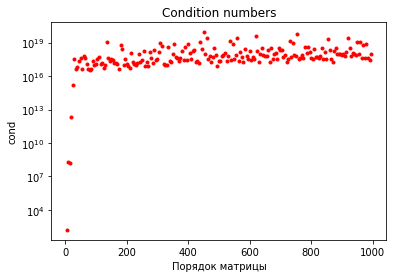

In [16]:
plt.semilogy(n_vector,cond_array,'.r')
plt.title('Condition numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('cond')
pass

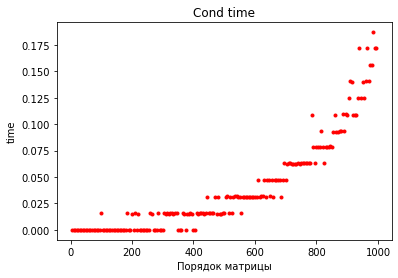

In [17]:
plt.plot(n_vector,t,'.r')
plt.title('Cond time')
plt.xlabel('Порядок матрицы')
plt.ylabel('time')
pass

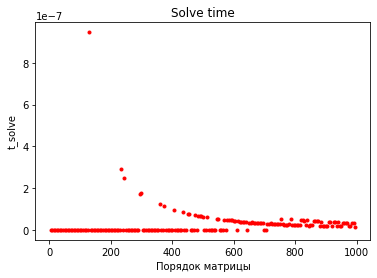

In [18]:
t_3=[]
for i in range (0,len(t_solve)):
    t_3.append(t_solve[i]/n_vector[i]**2)
plt.plot(n_vector,t_3,'.r')
plt.title('Solve time')
plt.xlabel('Порядок матрицы')
plt.ylabel('t_solve')
pass

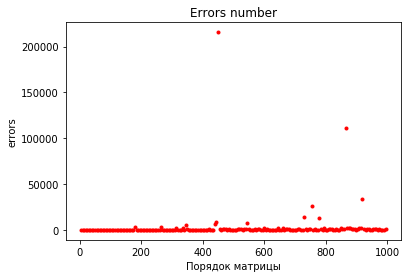

In [19]:
plt.plot(n_vector,er_array,'.r')
plt.title('Errors number')
plt.xlabel('Порядок матрицы')
plt.ylabel('errors')
pass

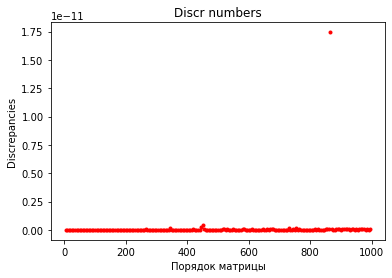

In [20]:
plt.plot(n_vector,discr_array,'.r')
plt.title('Discr numbers')
plt.xlabel('Порядок матрицы')
plt.ylabel('Discrepancies')
pass

Выводы из проведённых экспериментов:
1.Время работы функции cond и функции solve не зависит от диапазона элементов матрицы.
2.Время работы функции cond и функции solve не зависит от числа обусловленности матрицы.
3.Время работы функции cond и функции solve зависит от порядка матрицы, причём для cond время растёт квадратично, а для функции solve время растёт кубически.
4.Относительная ошибка решения и величина критерия невязки растёт с ростом порядка матрицы. Это связано с накоплением ошибок округления. Чем больше порядок матрицы, тем больше ошибок округления накопится.